In [22]:
import numpy as np
import tensorflow.compat.v1 as tf
from tensorflow.compat.v1 import keras
from tensorflow.compat.v1.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
tfd=tfp.distributions
from tensorflow.keras.datasets import mnist
from sklearn.utils import shuffle
tf.compat.v1.disable_eager_execution()
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Class Dense

In [2]:
class Denseab(object):
    def __init__(self,name,M1,M2,apply_batch_norm,f=tf.nn.relu):
        
        self.W=tf.get_variable("W%s" %name,shape=(M1,M2),initializer=tf.random_normal_initializer(stddev=2/np.sqrt(M1)),dtype=tf.float32)
        #tf.Variable(tf.random_normal((M1,M2))*2/np.sqrt(M1))
        self.b=tf.get_variable("b%s" %name,shape=(M2,),initializer=tf.zeros_initializer(),dtype=tf.float32)
        #tf.Variable(tf.zeros(M2),dtype=tf.float32)
        self.f=f
        self.bm=apply_batch_norm
    
    def forward(self,X):
            
        sal=tf.matmul(X,self.W)+self.b
    
        if self.bm:
            sal=tf.layers.batch_normalization(sal)
            #tf.keras.layers.BatchNormalization(trainable=True)(sal)
            
        return(self.f(sal))  

In [2]:
class Denseab(object):
    def __init__(self,M1,M2,apply_batch_norm,f=tf.nn.relu):
        
        self.W=tf.Variable(tf.random_normal((M1,M2))*2/np.sqrt(M1))
        self.b=tf.Variable(tf.zeros(M2),dtype=tf.float32)
        self.f=f
        self.bm=apply_batch_norm
    
    def forward(self,X):
            
        sal=tf.matmul(X,self.W)+self.b
    
        if self.bm:
            sal=tf.keras.layers.BatchNormalization()(sal)
            
        return(self.f(sal))    

In [17]:
X=np.random.normal(size=(5,4)).astype(np.float32)
ej=Denseab("pera",X.shape[1],20,True).forward(X)

In [4]:
init=tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(ej))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
[[0.         0.62833357 0.         0.         0.         0.
  0.10282835 0.         0.         0.         0.         1.7837385
  2.2137847  0.         0.         0.28557265 0.         0.
  0.9183229  0.        ]
 [1.5675393  0.         0.         2.9898515  0.77080286 1.2043337
  0.06190677 1.8101764  0.93976384 0.         0.         0.
  0.         0.         0.8705033  0.         0.         2.8809638
  0.         0.6723528 ]
 [1.7995238  0.         0.         2.3907702  0.         2.0369208
  0.35715067 0.98024017 0.8761933  0.80832595 0.         0.
  0.         0.         0.6615578  0.         0.         3.089934
  0.         1.5807939 ]
 [1.2151855  0.         0.9932383  2.4377491  0.38565493 0.9221437
  0.         2.5674784  1.2628558  0.         0.2693361  0.
  0.24194731 0.         0.7566757  0.         0.19779542 2.6105025
  0.1534216  0.7394802 ]
 [0.18913983 0.34064054 0.         0.39045274 0.45105523 0

# class ConvLayer

In [3]:
class ConvLayer:
    def __init__(self,name,tam,filtros,tam_filtros,stride,pad,apply_batch_norm,f=tf.nn.relu):
        """
        Input:
              tam.-int número de canales o colores en imágenes ex: RGB son 3
              filtros.- int número de filtros a usar
              tam_filtros.- int tamaño de los filtros si tam=n fitro es de n x n
              stride.- int número de strides para recorrer
              pad.-string padding
              apply_bm...- bool si se usa batch normalization
              f.-object función de activación
              
          Out:
              self.W.- array de tam_fitros x tam_filtros  x tam x filtros son los pesos de los filtros definidos
              self.b.- array de biases de dimensión filtros so los biases que se usan
        
        """
        self.W=tf.get_variable("W%s" %name,shape=(tam_filtros,tam_filtros,tam,filtros),initializer=tf.random_normal_initializer(stddev=(2/np.sqrt(filtros))),dtype=tf.float32)
        #tf.Variable(tf.random_normal((tam_filtros,tam_filtros,tam,filtros))*2/np.sqrt(filtros))
        self.b=tf.get_variable("b%s" %name,shape=(filtros,),initializer=tf.zeros_initializer(),dtype=tf.float32)
        #tf.Variable((tf.zeros(filtros)),dtype=tf.float32)

        self.filtros=filtros
        self.tam_filtros=tam_filtros
        self.stride=stride
        self.pad=pad
        self.f=f
        self.bm=apply_batch_norm
            
    def forward(self,X):
        """
        Input:
              X.-array input 
          Out:
              self.f(sal)- array de f(filtros) convolucionados con X
        
        """        
        sal=tf.nn.conv2d(X,filter=self.W,strides=self.stride,padding=self.pad)
        sal=sal+self.b
        if self.bm:
            return(self.f(tf.layers.batch_normalization(sal)))
        else:
            return(self.f(sal))
    

In [3]:
class ConvLayer:
    def __init__(self,tam,filtros,tam_filtros,stride,pad,apply_batch_norm,f=tf.nn.relu):
        """
        Input:
              tam.-int número de canales o colores en imágenes ex: RGB son 3
              filtros.- int número de filtros a usar
              tam_filtros.- int tamaño de los filtros si tam=n fitro es de n x n
              stride.- int número de strides para recorrer
              pad.-string padding
              apply_bm...- bool si se usa batch normalization
              f.-object función de activación
              
          Out:
              self.W.- array de tam_fitros x tam_filtros  x tam x filtros son los pesos de los filtros definidos
              self.b.- array de biases de dimensión filtros so los biases que se usan
        
        """
        self.W=tf.Variable(tf.random_normal((tam_filtros,tam_filtros,tam,filtros))*2/np.sqrt(filtros))
        self.b=tf.Variable((tf.zeros(filtros)),dtype=tf.float32)

        self.filtros=filtros
        self.tam_filtros=tam_filtros
        self.stride=stride
        self.pad=pad
        self.f=f
        self.bm=apply_batch_norm
            
    def forward(self,X):
        """
        Input:
              X.-array input 
          Out:
              self.f(sal)- array de f(filtros) convolucionados con X
        
        """        
        sal=tf.nn.conv2d(X,filter=self.W,strides=self.stride,padding=self.pad)
        sal=sal+self.b
        if self.bm:
            return(self.f(tf.keras.layers.BatchNormalization()(sal)))
        else:
            return(self.f(sal))
        

In [6]:
XX=np.random.normal(size=(2,5,5)).reshape(1,5,5,2).astype(np.float32)/255.
em=ConvLayer(2,32,3,1,"VALID",True).forward(XX)
em

<tf.Tensor 'Relu_1:0' shape=(1, 3, 3, 32) dtype=float32>

In [7]:
#tf.nn.conv2d(XX,filters=5,strides=5,padding="SAME")

In [8]:
init=tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init)
    au=sess.run(em)

# Class Conv2transpose

In [4]:
class ConvLayerTranspose:
    def __init__(self,name,out_shape,tam,filtros,tam_filtros,stride,pad,apply_batch_norm,f=tf.nn.relu):
        """
        Input:
              out_shape.-array tamaño deseado de salida normalmente es (None,2*H,2*W,filtros/2)
              tam.-int número de canales o colores en imágenes ex: RGB son 3
              filtros.- int número de filtros a usar
              tam_filtros.- int tamaño de los filtros si tam=n fitro es de n x n
              stride.- int número de strides para recorrer
              pad.-string padding
              apply_bm...- bool si se usa batch normalization
              f.-object función de activación
              
          Out:
              self.W.- array de tam_fitros x tam_filtros  x filtros x tam (al revés que conv) son los pesos de los filtros definidos
              self.b.- array de biases de dimensión filtros so los biases que se usan
        
        """
        self.W=tf.get_variable("W%s" %name,shape=(tam_filtros,tam_filtros,filtros,tam),initializer=tf.random_normal_initializer(stddev=(2/np.sqrt(filtros))),dtype=tf.float32)
        #tf.Variable(tf.random_normal((tam_filtros,tam_filtros,filtros,tam))*2/np.sqrt(filtros))
        self.b=tf.get_variable("b%s" %name,shape=(filtros,),initializer=tf.zeros_initializer(),dtype=tf.float32)
        #tf.Variable((tf.zeros(filtros)),dtype=tf.float32)

        self.out_shape=out_shape
        self.filtros=filtros
        self.tam_filtros=tam_filtros
        self.stride=stride
        self.pad=pad
        self.f=f
        self.bm=apply_batch_norm
            
    def forward(self,X):
        """
        Input:
              X.-array input 
          Out:
              self.f(sal)- array de f(filtros) convolucionados con X
        
        """        
        sal=tf.nn.conv2d_transpose(value=X,filter=self.W,output_shape=self.out_shape,strides=self.stride,padding=self.pad)
        
        sal=sal+self.b
        #print(self.f(tf.keras.layers.BatchNormalization()(sal)))
        if self.bm:
            return(self.f(tf.layers.batch_normalization(sal)))
        else:
            return(self.f(sal))

In [4]:
class ConvLayerTranspose:
    def __init__(self,out_shape,tam,filtros,tam_filtros,stride,pad,apply_batch_norm,f=tf.nn.relu):
        """
        Input:
              out_shape.-array tamaño deseado de salida normalmente es (None,2*H,2*W,filtros/2)
              tam.-int número de canales o colores en imágenes ex: RGB son 3
              filtros.- int número de filtros a usar
              tam_filtros.- int tamaño de los filtros si tam=n fitro es de n x n
              stride.- int número de strides para recorrer
              pad.-string padding
              apply_bm...- bool si se usa batch normalization
              f.-object función de activación
              
          Out:
              self.W.- array de tam_fitros x tam_filtros  x filtros x tam (al revés que conv) son los pesos de los filtros definidos
              self.b.- array de biases de dimensión filtros so los biases que se usan
        
        """
        self.W=tf.Variable(tf.random_normal((tam_filtros,tam_filtros,filtros,tam))*2/np.sqrt(filtros))
        self.b=tf.Variable((tf.zeros(filtros)),dtype=tf.float32)

        self.out_shape=out_shape
        self.filtros=filtros
        self.tam_filtros=tam_filtros
        self.stride=stride
        self.pad=pad
        self.f=f
        self.bm=apply_batch_norm
            
    def forward(self,X):
        """
        Input:
              X.-array input 
          Out:
              self.f(sal)- array de f(filtros) convolucionados con X
        
        """        
        sal=tf.nn.conv2d_transpose(value=X,filter=self.W,output_shape=self.out_shape,strides=self.stride,padding=self.pad)
        
        sal=sal+self.b
        #print(self.f(tf.keras.layers.BatchNormalization()(sal)))
        if self.bm:
            return(self.f(tf.keras.layers.BatchNormalization()(sal)))
        else:
            return(self.f(sal))
        

In [10]:
au.shape

(1, 3, 3, 32)

In [11]:
salo=[1,6,6,16]
#Recordar que tam=32 en eestea caso los canales o colores
arg=ConvLayerTranspose(salo,tam=32,filtros=16,tam_filtros=6,stride=2,pad="SAME",apply_batch_norm=True)
emarg=arg.forward(au)
emarg

<tf.Tensor 'Relu_2:0' shape=(1, 6, 6, 16) dtype=float32>

In [12]:
initx=tf.initialize_all_variables()
with tf.Session() as ses:
    ses.run(initx)
    aurt=ses.run(emarg)

In [13]:
au.shape,aurt.shape

((1, 3, 3, 32), (1, 6, 6, 16))

# Probando las clases...

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input
X,Y=np.concatenate([mnist.load_data()[0][0],mnist.load_data()[1][0]]),np.concatenate([mnist.load_data()[0][1],mnist.load_data()[1][1]])
X=X.astype("float32")/255.0

In [6]:
Xej=X.reshape(X.shape[0],X.shape[1],X.shape[2],1)
Xej.shape

(70000, 28, 28, 1)

In [16]:
x=ConvLayer(1,2,3,stride=2,pad="SAME",apply_batch_norm=True).forward(Xej)
x.shape

TensorShape([70000, 14, 14, 2])

In [17]:
exsal=[70000,28,28,1]

x1=ConvLayerTranspose(exsal,tam=2,filtros=1,tam_filtros=3,stride=2,pad="SAME",apply_batch_norm=True).forward(x)
#x1=ConvLayerTranspose(exsal,tam=32,filtros=16,tam_filtros=3,stride=2,pad="SAME",apply_batch_norm=True).forward(x)
x1.shape

TensorShape([70000, 28, 28, 1])

In [18]:
np.array(exsal)*np.array([1,2,2,0.5])*np.array([1,2,2,0.5])

array([7.00e+04, 1.12e+02, 1.12e+02, 2.50e-01])

In [19]:
x2=tf.layers.flatten(x1)
print("shape x2:",x2.shape)
x2=Denseab(x2.shape[1],200,apply_batch_norm=True).forward(x2)
x2.shape

Instructions for updating:
Use keras.layers.Flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
shape x2: (70000, 784)


TensorShape([70000, 200])

## Discriminador

In [20]:
w=ConvLayer(tam=Xej.shape[3],filtros=10,tam_filtros=3,stride=2,pad="SAME",apply_batch_norm=True).forward(Xej)
w=ConvLayer(tam=w.shape[3],filtros=2,tam_filtros=2,stride=2,pad="SAME",apply_batch_norm=True).forward(w)
w=tf.layers.flatten(w)
w=Denseab(M1=w.shape[1],M2=200,apply_batch_norm=True).forward(w)
w=Denseab(M1=w.shape[1],M2=10,apply_batch_norm=True,f=tf.nn.softmax).forward(w)
w.shape

TensorShape([70000, 10])

## Función Discriminador con diccionarios{}

In [7]:
class Discrim:
    def __init__(self,d_sizes):
        self.dsizes=d_sizes
        
    def forward(self,X):
        conv_lay=[]
        inp=X.shape[-1]
        cont=0
        for f,tfilt,st,bm in self.dsizes['conv_layers']:
            name="conv_lay_%s"%cont
            cont+=1
            conv_lay.append(ConvLayer(name=name,tam=inp,filtros=f,tam_filtros=tfilt,stride=st,pad="SAME",apply_batch_norm=bm))
            inp=f
        
        ent=X
        for clayer in conv_lay:
            ent=clayer.forward(ent)
        
        #print("---",tf.layers.flatten(ent))
        
        sal=tf.layers.flatten(ent)
        dense_lay=[]
        salinp=sal.shape[-1]
        for n,bm in self.dsizes["dense_layers"]:
            namex="dense_%s"%cont
            cont+=1
            dense_lay.append(Denseab(namex,salinp,n,bm))
            salinp=n
            
        namex="dense_%s"%cont
        dense_lay.append(Denseab(namex,salinp,1,apply_batch_norm=False,f=lambda x:x))
        
        for layer in dense_lay:
            sal=layer.forward(sal)
        
        return(sal)
                  

In [7]:
class Discrim:
    def __init__(self,d_sizes):
        self.dsizes=d_sizes
        
    def forward(self,X):
        conv_lay=[]
        inp=X.shape[-1]
        for f,tfilt,st,bm in self.dsizes['conv_layers']:
            conv_lay.append(ConvLayer(tam=inp,filtros=f,tam_filtros=tfilt,stride=st,pad="SAME",apply_batch_norm=bm))
            inp=f
        
        ent=X
        for clayer in conv_lay:
            ent=clayer.forward(ent)
        
        #print("---",tf.layers.flatten(ent))
        
        sal=tf.layers.flatten(ent)
        dense_lay=[]
        salinp=sal.shape[-1]
        for n,bm in self.dsizes["dense_layers"]:
            dense_lay.append(Denseab(salinp,n,bm))
            salinp=n
        
        dense_lay.append(Denseab(salinp,1,apply_batch_norm=False,f=lambda x:x))
        
        for layer in dense_lay:
            sal=layer.forward(sal)
        
        return(sal)
            

In [7]:
d_sizes = {
    'conv_layers': [(2, 5, 2, False), (64, 5, 2, True)],
    'dense_layers': [(1024, True)],
  }

In [9]:
ob=Discrim(d_sizes)
sal=ob.forward(Xej[:20])
sal

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use keras.layers.Flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


<tf.Tensor 'discrim/add_3:0' shape=(20, 1) dtype=float32>

In [24]:
%%time
ini=tf.initialize_all_variables()
with tf.Session() as sses:
    sses.run(ini)
    ejem=sses.run(tf.nn.sigmoid(sal))


Wall time: 1.87 s


In [25]:
d_sizes['conv_layers']

[(2, 5, 2, False), (64, 5, 2, True)]

In [26]:
w=ConvLayer(tam=Xej.shape[3],filtros=2,tam_filtros=5,stride=2,pad="SAME",apply_batch_norm=False).forward(Xej)
w=ConvLayer(tam=w.shape[3],filtros=64,tam_filtros=5,stride=2,pad="SAME",apply_batch_norm=True).forward(w)
w.shape

TensorShape([70000, 7, 7, 64])

In [27]:
Xej.shape[-1]

1

In [28]:
tf.layers.flatten(w).shape[-1]

3136

In [29]:
#tf.layers.batch_normalization()
1024/128

8.0

## Generador

In [30]:
vw=np.random.normal(size=(5,100)).astype("float32")#tf.random_normal(shape=(5,100))
vw=Denseab(vw.shape[1],1024,apply_batch_norm=True).forward(vw)
vw=Denseab(vw.shape[1],128*7*7,apply_batch_norm=False).forward(vw)
vw=tf.reshape(vw,shape=(-1,7,7,128))
vw=ConvLayerTranspose(out_shape=[1,14,14,128],tam=128,filtros=128,tam_filtros=5,stride=2,pad="SAME",apply_batch_norm=True).forward(vw)
vw=ConvLayerTranspose(out_shape=[1,28,28,1],tam=128,filtros=1,tam_filtros=5,stride=2,pad="SAME",apply_batch_norm=True).forward(vw)
vw.shape

TensorShape([1, 28, 28, 1])

## Función Generador con diccionarios{}

In [8]:
g_sizes = {
    'z': 100,
    'projection': 784,#128,
    'bn_after_project': False,
    'conv_layers': [(128, 5, 2, True), (1, 5, 2, False)],
    'dense_layers': [(784, True)],
    'output_activation': tf.tanh,
  }


In [32]:
len(g_sizes)

6

In [33]:
#tf.random_normal(shape=(1,100))
#g_sizes["conv_layers"][1][2]
aux=28
for j in range(len(g_sizes["conv_layers"])):
    aux//=g_sizes["conv_layers"][j][2]
    print(aux)

14
7


In [10]:
class Gener:
    def __init__(self,g_sizes,img_size):
        self.dims=[img_size]
        self.gsizes=g_sizes
        #self.z=Z#tf.random_normal(shape=(1,self.gsizes["z"]))
        
        aux=img_size
        for j in range(len(self.gsizes["conv_layers"])):
            aux//=self.gsizes["conv_layers"][j][2]
            self.dims.append(aux)
            
    def forward(self,Z):
        
        ent=Z#self.z
        dense_lay=[]
        salcont=ent.shape[0]
        salinp=ent.shape[-1]
        #print("salinp:",ent.shape)
        cont=0
        for n,bm in self.gsizes["dense_layers"]:
            name="dense_gen_%s"%cont
            cont+=1
            dense_lay.append(Denseab(name,salinp,n,bm))
            salinp=n
        name="dense_gen_%s"%cont
        dense_lay.append(Denseab(name,salinp,self.gsizes["projection"]*self.dims[-1]*self.dims[-1],apply_batch_norm=self.gsizes["bn_after_project"]))
        
        for layer in dense_lay:
            ent=layer.forward(ent)
            

            
        ent_res=tf.reshape(ent,shape=(salcont,self.dims[-1],self.dims[-1],self.gsizes["projection"]))
        print("ent_res",ent_res.shape)
        conv_lay=[]
        inp=ent_res.shape[-1]
        i=-1
        #outshape=[1,self.dims[i],self.dims[i],inp]
        
        for f,tfilt,st,bm in self.gsizes['conv_layers']:
            namex="convt_gen_%s"%cont
            cont+=1
            outshape=(salcont,self.dims[i-1],self.dims[i-1],f)
            conv_lay.append(ConvLayerTranspose(name=namex,out_shape=outshape,tam=inp,filtros=f,tam_filtros=tfilt,stride=st,pad="SAME",apply_batch_norm=bm))
            inp=f
            i-=1
            print(i,outshape,f)
            
        
        #ent=X
        for clayer in conv_lay:
            
            ent_res=clayer.forward(ent_res)
            print(ent_res.shape)

        
        return(self.gsizes['output_activation'](ent_res))

In [10]:
class Gener:
    def __init__(self,g_sizes,img_size):
        self.dims=[img_size]
        self.gsizes=g_sizes
        #self.z=Z#tf.random_normal(shape=(1,self.gsizes["z"]))
        
        aux=img_size
        for j in range(len(self.gsizes["conv_layers"])):
            aux//=self.gsizes["conv_layers"][j][2]
            self.dims.append(aux)
            
    def forward(self,Z):
        
        ent=Z#self.z
        dense_lay=[]
        salcont=ent.shape[0]
        salinp=ent.shape[-1]
        #print("salinp:",ent.shape)
        cont=0
        for n,bm in self.gsizes["dense_layers"]:
            name=
            dense_lay.append(Denseab(salinp,n,bm))
            salinp=n
        
        dense_lay.append(Denseab(salinp,self.gsizes["projection"]*self.dims[-1]*self.dims[-1],apply_batch_norm=self.gsizes["bn_after_project"]))
        
        for layer in dense_lay:
            ent=layer.forward(ent)
            

            
        ent_res=tf.reshape(ent,shape=(salcont,self.dims[-1],self.dims[-1],self.gsizes["projection"]))
        print("ent_res",ent_res.shape)
        conv_lay=[]
        inp=ent_res.shape[-1]
        i=-1
        #outshape=[1,self.dims[i],self.dims[i],inp]
        for f,tfilt,st,bm in self.gsizes['conv_layers']:
            outshape=(salcont,self.dims[i-1],self.dims[i-1],f)
            conv_lay.append(ConvLayerTranspose(out_shape=outshape,tam=inp,filtros=f,tam_filtros=tfilt,stride=st,pad="SAME",apply_batch_norm=bm))
            inp=f
            i-=1
            print(i,outshape,f)
            
        
        #ent=X
        for clayer in conv_lay:
            
            ent_res=clayer.forward(ent_res)
            print(ent_res.shape)

        
        return(self.gsizes['output_activation'](ent_res))
            

In [11]:
zz=np.random.normal(size=(5,100)).astype("float32")


In [36]:
genim=Gener(g_sizes,img_size=28)

In [37]:
salida=genim.forward(zz)
salida

ent_res (5, 7, 7, 128)
-2 (5, 14, 14, 128) 128
-3 (5, 28, 28, 1) 1
(5, 14, 14, 128)
(5, 28, 28, 1)


<tf.Tensor 'Sigmoid_1:0' shape=(5, 28, 28, 1) dtype=float32>

In [38]:
#tf.reset_default_graph
ni2=tf.initialize_all_variables()
with tf.Session() as ess:
    ess.run(ni2)
    fimg=ess.run(salida)

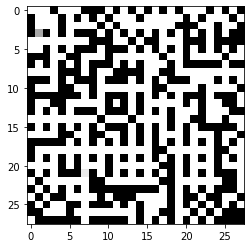

In [39]:
plt.imshow(fimg[0].reshape(28,28),cmap="gray")

In [40]:
fimg.shape

(5, 28, 28, 1)

In [41]:
#niti2=tf.all_variables()
#with tf.Session() as ss:
    #ss.run(niti2)
    #ss.run(salgen)

## pasando imagen fake

In [42]:
fimg.shape

(5, 28, 28, 1)

In [43]:
res=Discrim(d_sizes).forward(fimg)
niti3=tf.initialize_all_variables()
with tf.Session() as sse:
    sse.run(niti3)
    print(sse.run(tf.nn.sigmoid(res)))

[[0.99934846]
 [0.99962485]
 [0.9823155 ]
 [0.9431972 ]
 [0.9909485 ]]


## Funciones

In [62]:
def discriminador(X,reuse=None):
    with tf.variable_scope('dix',reuse=reuse):
        obj=Discrim(d_size).forward(X)
        return(obj)

## optimizando

In [13]:
bch=64

In [12]:
img_size=28
num_channels=1
g_size=g_sizes
d_size=d_sizes
X=tf.placeholder(dtype=tf.float32,shape=(None,img_size,img_size,num_channels),name="X")
Z=tf.placeholder(dtype=tf.float32,shape=(bch,g_size["z"]),name="Z")
obj=Discrim(d_size)
#logits=obj.forward(X)
#sample_img=Gener(g_size,img_size).forward(Z)
#sample_logits=discriminador(sample_img,reuse=True)#Discrim(d_size).forward(sample_img,reuse=False)
#sample_img_test=Gener(g_size,img_size).forward(Z)

In [15]:
with tf.variable_scope("gener",reuse=tf.AUTO_REUSE):
    sample_img=Gener(g_size,img_size).forward(Z)

with tf.variable_scope("discrim",reuse=tf.AUTO_REUSE):
    logits=obj.forward(X)


ent_res (64, 7, 7, 128)
-2 (64, 14, 14, 128) 128
-3 (64, 28, 28, 1) 1
(64, 14, 14, 128)
(64, 28, 28, 1)


In [18]:
#sample_logits=obj.forward(sample_img,reuse=True)
tf.trainable_variables()

[<tf.Variable 'gener/Wdense_gen_0:0' shape=(100, 1024) dtype=float32>,
 <tf.Variable 'gener/bdense_gen_0:0' shape=(1024,) dtype=float32>,
 <tf.Variable 'gener/Wdense_gen_1:0' shape=(1024, 6272) dtype=float32>,
 <tf.Variable 'gener/bdense_gen_1:0' shape=(6272,) dtype=float32>,
 <tf.Variable 'gener/batch_normalization/gamma:0' shape=(1024,) dtype=float32>,
 <tf.Variable 'gener/batch_normalization/beta:0' shape=(1024,) dtype=float32>,
 <tf.Variable 'gener/Wconvt_gen_1:0' shape=(5, 5, 128, 128) dtype=float32>,
 <tf.Variable 'gener/bconvt_gen_1:0' shape=(128,) dtype=float32>,
 <tf.Variable 'gener/Wconvt_gen_2:0' shape=(5, 5, 1, 128) dtype=float32>,
 <tf.Variable 'gener/bconvt_gen_2:0' shape=(1,) dtype=float32>,
 <tf.Variable 'gener/batch_normalization_1/gamma:0' shape=(128,) dtype=float32>,
 <tf.Variable 'gener/batch_normalization_1/beta:0' shape=(128,) dtype=float32>,
 <tf.Variable 'discrim/Wconv_lay_0:0' shape=(5, 5, 1, 2) dtype=float32>,
 <tf.Variable 'discrim/bconv_lay_0:0' shape=(2,) d

In [14]:
#sesion.run(tf.nn.sigmoid(logits),feed_dict={X:Xej[:20]})
#sesion.run(sample_img,feed_dict={Z:zz})
#si=sesion.run(sample_img,feed_dict={Z:zz})
#Xej.shape

In [17]:
with tf.variable_scope("discrim") as scope:
    scope.reuse_variables()
    sample_logits=obj.forward(sample_img)

#with tf.variable_scope("gener") as scope:
#    scope.reuse_variables()
#    sample_img_test=Gener(g_size,img_size).forward(Z)    
    

In [53]:
#sesion.run(sample_img,feed_dict={Z:zz})

In [19]:
d_costo_real=tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=tf.ones_like(logits))
d_costo_fake=tf.nn.sigmoid_cross_entropy_with_logits(logits=sample_logits,labels=tf.zeros_like(sample_logits))
#sesion.run(d_costo_fake,feed_dict={Z:zz})

In [20]:
d_costo=tf.reduce_mean(d_costo_real)+tf.reduce_mean(d_costo_fake)
g_costo=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=sample_logits,labels=tf.ones_like(sample_logits)))
#sesion.run(d_costo,feed_dict={X:Xej[:20],Z:zz})
#sesion.run(g_costo,feed_dict={Z:zz})

In [31]:
print(len(tf.trainable_variables()))
#tf.trainable_variables()
#tw

24


In [22]:
real_predictions = tf.cast(logits > 0, tf.float32)
fake_predictions = tf.cast(sample_logits < 0, tf.float32)
num_predictions = 2.0*bch
num_correct = tf.reduce_sum(real_predictions) + tf.reduce_sum(fake_predictions)
d_acc = num_correct / num_predictions

In [23]:
#gs=tf.trainable_variables()[12:24]
#ds=tf.trainable_variables()[:12]+tf.trainable_variables()[24:]
d_params = [t for t in tf.trainable_variables() if t.name.startswith('d')]
g_params = [t for t in tf.trainable_variables() if t.name.startswith('g')]
#print(len(gs),len(ds))
d_train_opt=tf.train.AdamOptimizer(0.0002,beta1=.5).minimize(d_costo,var_list=d_params)
g_train_opt=tf.train.AdamOptimizer(0.0002,beta1=.5).minimize(g_costo,var_list=g_params)

In [24]:
inses=tf.global_variables_initializer()
sesion=tf.InteractiveSession()
sesion.run(inses)

In [25]:
#sesion.run(d_costo,feed_dict={X:Xej[:5],Z:zz})
#sesion.run((d_train_opt,d_costo),feed_dict={X:Xej[:5],Z:zz})
#sesion.run(g_train_opt,feed_dict={Z:zz})

epoch 0 0


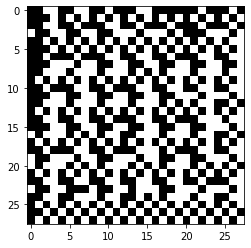

epoch 1 1.0


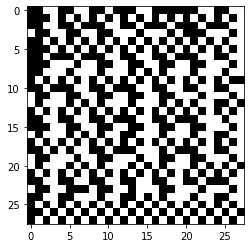

epoch 2 1.0


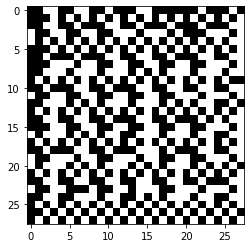

epoch 3 1.0


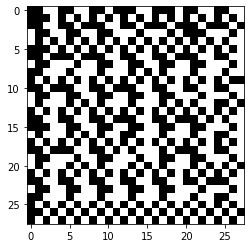

epoch 4 1.0


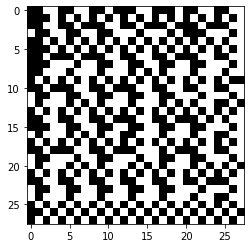

epoch 5 1.0


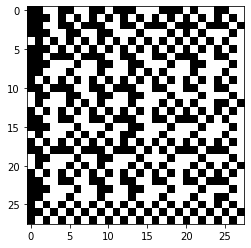

epoch 6 1.0


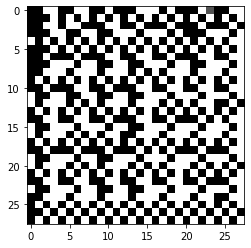

epoch 7 1.0


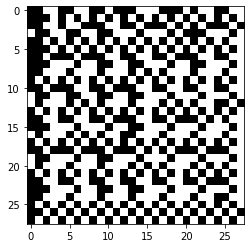

epoch 8 1.0


KeyboardInterrupt: 

In [32]:
xx=Xej
N=len(xx)
n_batches=N//bch
d_costos=[]
g_costos=[]
#imgens=[]
d_accx=0
#print(gs[0].eval()[0][0])
for i in range(10):
    print("epoch",i,d_accx)
    np.random.shuffle(xx)
    for j in range(n_batches):
        bach=xx[j*bch:(j+1)*bch]
        z=np.random.uniform(-1, 1, size=(bch, 100))#np.random.normal(size=(bch,g_size["z"]))
        #print(j)
        _,d_costox,d_accx,logs=sesion.run([d_train_opt,d_costo,d_acc,tf.nn.sigmoid(logits)],feed_dict={X:bach,Z:z})
    
        d_costos.append(d_costox)
        _,g_costox,imgsf=sesion.run([g_train_opt,g_costo,sample_img],feed_dict={Z:z})
        g_costos.append(g_costox)
    #print(logs)    
    plt.imshow(imgsf[0].reshape(28,28),cmap="gray")
    plt.show()

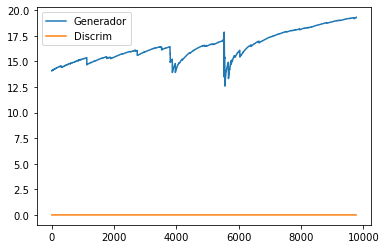

In [33]:
plt.plot(g_costos,label='Generador')
plt.plot(d_costos,label='Discrim')
plt.legend()

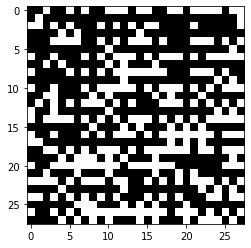

In [49]:
plt.imshow(imgsf[-3].reshape(28,28),cmap="gray")

In [39]:
#gs[0].eval()
#sesion.run(Discrim(d_size).forward(imgsf[-3].reshape(1,28,28,1)))

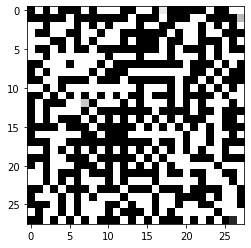

In [41]:
plt.imshow(sesion.run(sample_img,feed_dict={Z:z})[0].reshape(28,28),cmap="gray")

# DCGAN

In [341]:
class DCGAN:
    def __init__(self,img_size,num_channels,g_size,d_size):
        self.img_size=img_size
        self.num_channels=num_channels
        #inputs:
        self.X=tf.placeholder(dtype=tf.float32,shape=(None,img_size,img_size,num_channels),name="X")
        self.Z=tf.placeholder(dtype=tf.float32,shape=(None,g_size["z"]),name="Z")
        
        self.batch_sz=tf.placeholder(dtype=tf.float32,shape=(),name="batch_sz")
        
        #discriminador
        logits=Discrim(d_size).forward(X)
        
        #gnenerador:
        self.sample_img=Gener(g_size,img_size).forward()
        
        with tf.variable_scope("discriminator") as scope:
            scope.reuse_variables()
            sample_logits=Discrim(d_size).forward(self.sample_img)
            
        # get sample images for test time (batch norm is different)
        with tf.variable_scope("generator") as scope:
            scope.reuse_variables()
            self.sample_img_test=Gener(g_size,img_size).forward()
            
        #costos
        self.d_costo_real=tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=tf.ones_like(logits))
        #fakes
        self.d_costo_fake=tf.nn.sigmoid_cross_entropy_with_logits(logits=sample_logits,labels=tf.zeros_like(sample_logits))
        
        self.d_cost = tf.reduce_mean(self.d_costo_real) + tf.reduce_mean(self.d_costo_fake)
        self.g_cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=sample_logits,labels=tf.ones_like(sample_logits)))
        
        real_predictions = tf.cast(logits > 0, tf.float32)
        fake_predictions = tf.cast(sample_logits < 0, tf.float32)
        num_predictions = 2.0*BATCH_SIZE
        num_correct = tf.reduce_sum(real_predictions) + tf.reduce_sum(fake_predictions)
        self.d_accuracy = num_correct / num_predictions   
        
            # optimizers
        self.d_params = [t for t in tf.trainable_variables() if t.name.startswith('d')]
        self.g_params = [t for t in tf.trainable_variables() if t.name.startswith('g')]
        
        self.d_train_op = tf.train.AdamOptimizer(LEARNING_RATE, beta1=BETA1).minimize(self.d_cost, var_list=self.d_params)
        self.g_train_op = tf.train.AdamOptimizer(LEARNING_RATE, beta1=BETA1).minimize(self.g_cost, var_list=self.g_params)

        # show_all_variables()
        # exit()

        # set up session and variables for later
        self.init_op = tf.global_variables_initializer()
        self.sess = tf.InteractiveSession()
        self.sess.run(self.init_op)  

In [28]:
#tf.trainable_variables()

In [346]:
[t for t in tf.trainable_variables() if t.name.startswith('g')]

[]

In [24]:
70000//64

1093

# Otra Forma

## The Generator

In [9]:
def generator(gsizes,img_size,Z,reuse=None):
    with tf.variable_scope('gen',reuse=reuse):
        
        dims=[img_size]
        aux=img_size
        for j in range(len(gsizes["conv_layers"])):
            aux//=gsizes["conv_layers"][j][2]
            dims.append(aux)

        ent=Z#self.z
        dense_lay=[]
        salcont=ent.shape[0]
        salinp=ent.shape[-1]
        #print("salinp:",ent.shape)
        cont=0
        for n,bm in gsizes["dense_layers"]:
            name="dense_gen_%s"%cont
            cont+=1
            dense_lay.append(Denseab(name,salinp,n,bm))
            salinp=n
        name="dense_gen_%s"%cont
        dense_lay.append(Denseab(name,salinp,gsizes["projection"]#*dims[-1]*dims[-1]
                                 ,apply_batch_norm=not gsizes["bn_after_project"]))

        for layer in dense_lay:
            ent=layer.forward(ent)

        """"

        ent_res=tf.reshape(ent,shape=(salcont,dims[-1],dims[-1],gsizes["projection"]))
        print("ent_res",ent_res.shape)
        conv_lay=[]
        inp=ent_res.shape[-1]
        i=-1
        #outshape=[1,self.dims[i],self.dims[i],inp]

        for f,tfilt,st,bm in gsizes['conv_layers']:
            namex="convt_gen_%s"%cont
            cont+=1
            outshape=(salcont,dims[i-1],dims[i-1],f)
            conv_lay.append(ConvLayerTranspose(name=namex,out_shape=outshape,tam=inp,filtros=f,tam_filtros=tfilt,stride=st,pad="SAME",apply_batch_norm=bm))
            inp=f
            i-=1
            print(i,outshape,f)


        #ent=X
        for clayer in conv_lay:

            ent_res=clayer.forward(ent_res)
            print(ent_res.shape)

        """
        return(ent)#(gsizes['output_activation'](ent_res))

In [7]:
def generator(z,reuse=None):
    with tf.variable_scope('gen',reuse=reuse):
        hidden1 =Denseab("dense1",z.shape[1],128,True).forward(z)#tf.layers.dense(inputs=z,units=128)
        # Leaky Relu
        alpha = 0.01
        #hidden1 = tf.maximum(alpha*hidden1,hidden1)
        hidden2 = tf.layers.dense(inputs=hidden1,units=128)#Denseab("dense2",hidden1.shape[1],128,True).forward(hidden1)#tf.layers.dense(inputs=hidden1,units=128)
        
        hidden2 = tf.maximum(alpha*hidden2,hidden2)
        output = Denseab("dense3",hidden2.shape[1],784,True,f=tf.nn.tanh).forward(hidden2)#tf.layers.dense(hidden2,units=784,activation=tf.nn.tanh)
        return output

## The Discriminator

In [10]:
def discriminator(dsizes,X,reuse=None):
    with tf.variable_scope('dis',reuse=reuse):
        conv_lay=[]
        inp=X.shape[-1]
        cont=0
        for f,tfilt,st,bm in dsizes['conv_layers']:
            name="conv_lay_%s"%cont
            cont+=1
            conv_lay.append(ConvLayer(name=name,tam=inp,filtros=f,tam_filtros=tfilt,stride=st,pad="SAME",apply_batch_norm=bm))
            inp=f

        ent=X
        for clayer in conv_lay:
            ent=clayer.forward(ent)

        #print("---",tf.layers.flatten(ent))

        sal=tf.layers.flatten(ent)
        dense_lay=[]
        salinp=sal.shape[-1]
        for n,bm in dsizes["dense_layers"]:
            namex="dense_%s"%cont
            cont+=1
            dense_lay.append(Denseab(namex,salinp,n,bm))
            salinp=n

        namex="dense_%s"%cont
        dense_lay.append(Denseab(namex,salinp,1,apply_batch_norm=False,f=lambda x:x))

        for layer in dense_lay:
            sal=layer.forward(sal)

        return(tf.sigmoid(sal),sal)

In [8]:
def discriminator(X,reuse=None):
    with tf.variable_scope('dis',reuse=reuse):
        hidden1 = Denseab("pera",X.shape[1],128,True).forward(X)#tf.keras.layers.Dense(128)(X)#(inputs=X,units=128)
        # Leaky Relu
       # alpha = 0.01
       # hidden1 = tf.maximum(alpha*hidden1,hidden1)
        
        hidden2 = Denseab("pera2",hidden1.shape[1],128,True).forward(hidden1)#tf.layers.dense(inputs=hidden1,units=128)
        #hidden2 = tf.maximum(alpha*hidden2,hidden2)
        
        logits = Denseab("pera3",hidden2.shape[1],1,False,f=lambda x:x).forward(hidden2)#tf.layers.dense(hidden2,units=1)
        output = tf.sigmoid(logits)
    
        return output, logits

### Placeholders

In [9]:
real_images = tf.placeholder(tf.float32,shape=[None,784])#tf.placeholder(tf.float32,shape=[None,28,28,1])
z = tf.placeholder(tf.float32,shape=[None,100])

### Generator

In [13]:
G=tf.reshape(generator(g_sizes,28,z),shape=[100,28,28,1])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.


In [10]:
G=generator(z,reuse=tf.AUTO_REUSE)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.


In [11]:
tf.trainable_variables()

[<tf.Variable 'gen/Wdense1:0' shape=(100, 128) dtype=float32>,
 <tf.Variable 'gen/bdense1:0' shape=(128,) dtype=float32>,
 <tf.Variable 'gen/batch_normalization/gamma:0' shape=(128,) dtype=float32>,
 <tf.Variable 'gen/batch_normalization/beta:0' shape=(128,) dtype=float32>,
 <tf.Variable 'gen/dense/kernel:0' shape=(128, 128) dtype=float32>,
 <tf.Variable 'gen/dense/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'gen/Wdense3:0' shape=(128, 784) dtype=float32>,
 <tf.Variable 'gen/bdense3:0' shape=(784,) dtype=float32>,
 <tf.Variable 'gen/batch_normalization_1/gamma:0' shape=(784,) dtype=float32>,
 <tf.Variable 'gen/batch_normalization_1/beta:0' shape=(784,) dtype=float32>]

### Discriminator 


In [12]:
print(Xej.reshape(-1,784).shape)
#Xej=Xej.reshape(-1,784)
#s=np.random.uniform(-1, 1, size=(70000, 100))
#s.shape[1]
#generator(s,reuse=True)
#ini=tf.global_variables_initializer()
#with tf.Session() as ss:
#    ss.run(ini)
#    ss.run(D_fake_loss, feed_dict={real_images: Xej, z: s})

(70000, 784)


In [13]:
D_output_real , D_logits_real = discriminator(real_images)#discriminator(d_sizes,real_images)#(real_images)
D_output_fake, D_logits_fake = discriminator(G,reuse=True)#discriminator(d_sizes,G,reuse=True)

In [14]:
tf.trainable_variables()

[<tf.Variable 'gen/Wdense1:0' shape=(100, 128) dtype=float32>,
 <tf.Variable 'gen/bdense1:0' shape=(128,) dtype=float32>,
 <tf.Variable 'gen/batch_normalization/gamma:0' shape=(128,) dtype=float32>,
 <tf.Variable 'gen/batch_normalization/beta:0' shape=(128,) dtype=float32>,
 <tf.Variable 'gen/dense/kernel:0' shape=(128, 128) dtype=float32>,
 <tf.Variable 'gen/dense/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'gen/Wdense3:0' shape=(128, 784) dtype=float32>,
 <tf.Variable 'gen/bdense3:0' shape=(784,) dtype=float32>,
 <tf.Variable 'gen/batch_normalization_1/gamma:0' shape=(784,) dtype=float32>,
 <tf.Variable 'gen/batch_normalization_1/beta:0' shape=(784,) dtype=float32>,
 <tf.Variable 'dis/Wpera:0' shape=(784, 128) dtype=float32>,
 <tf.Variable 'dis/bpera:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dis/batch_normalization/gamma:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dis/batch_normalization/beta:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dis/Wpera2:0' shape=(128, 128)

### Losses

In [15]:
def loss_func(logits_in,labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in,labels=labels_in))

D_real_loss = loss_func(D_logits_real,tf.ones_like(D_logits_real)* (0.9))
D_fake_loss = loss_func(D_logits_fake,tf.zeros_like(D_logits_real))

D_loss = D_real_loss + D_fake_loss
G_loss = loss_func(D_logits_fake,tf.ones_like(D_logits_fake))

In [16]:
#tf.trainable_variables()

### Optimizers


In [17]:
learning_rate = 0.001
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

print([v.name for v in d_vars])
print([v.name for v in g_vars])

['dis/Wpera:0', 'dis/bpera:0', 'dis/batch_normalization/gamma:0', 'dis/batch_normalization/beta:0', 'dis/Wpera2:0', 'dis/bpera2:0', 'dis/batch_normalization_1/gamma:0', 'dis/batch_normalization_1/beta:0', 'dis/Wpera3:0', 'dis/bpera3:0']
['gen/Wdense1:0', 'gen/bdense1:0', 'gen/batch_normalization/gamma:0', 'gen/batch_normalization/beta:0', 'gen/dense/kernel:0', 'gen/dense/bias:0', 'gen/Wdense3:0', 'gen/bdense3:0', 'gen/batch_normalization_1/gamma:0', 'gen/batch_normalization_1/beta:0']


In [18]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list=d_vars)
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list=g_vars)

## Training Session

In [19]:
batch_size = 100
epochs = 300
init = tf.global_variables_initializer()
saver = tf.train.Saver(var_list=g_vars)

In [20]:
# Save a sample per epoch
samples = []

In [ ]:
%%time
with tf.Session() as sess:
    
    sess.run(init)
    
    # Recall an epoch is an entire run through the training data
    for e in range(epochs):
        # // indicates classic division
        num_batches = len(Xej) // batch_size
        
        for i in range(num_batches):
            
            # Grab batch of images
            batch = Xej[i*batch_size:(i+1)*batch_size]#mnist.train.next_batch(batch_size)
            
            # Get images, reshape and rescale to pass to D
            batch_images = batch#.reshape((batch_size, 784))
            batch_images = batch_images*2 - 1
            
            # Z (random latent noise data for Generator)
            # -1 to 1 because of tanh activation
            batch_z = np.random.uniform(-1, 1, size=(batch_size, 100))
            
            # Run optimizers, no need to save outputs, we won't use them
            _ = sess.run(D_trainer, feed_dict={real_images: batch_images, z: batch_z})
            _ = sess.run(G_trainer, feed_dict={z: batch_z})
        
            
        print("Currently on Epoch {} of {} total...".format(e+1, epochs))
        
        # Sample from generator as we're training for viewing afterwards
        sample_z = np.random.uniform(-1, 1, size=(100, 100))
        gen_sample = sess.run(generator(g_sizes,28,z ,reuse=True),feed_dict={z: sample_z})
        
        samples.append(gen_sample)
        
#         saver.save(sess, './models/500_epoch_model.ckpt')

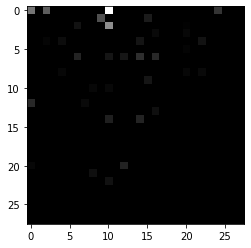

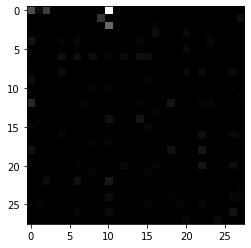

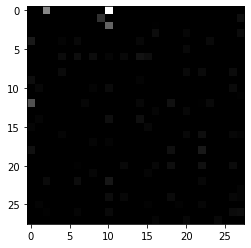

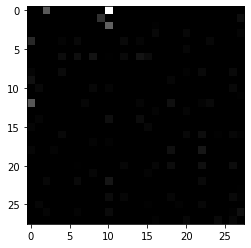

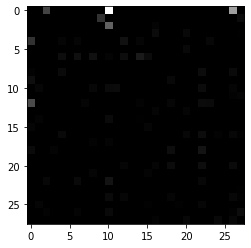

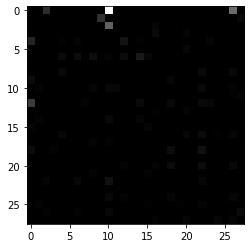

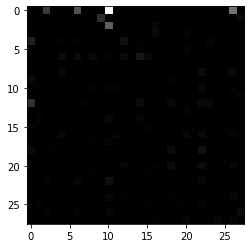

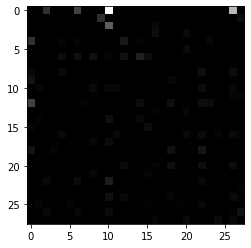

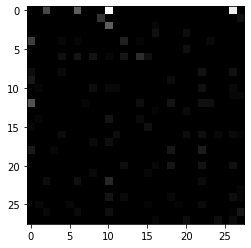

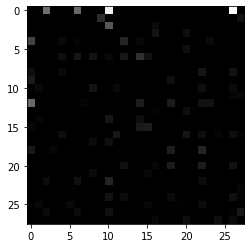

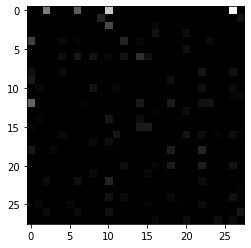

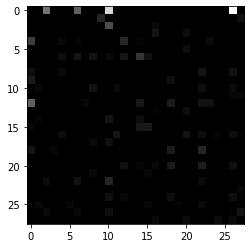

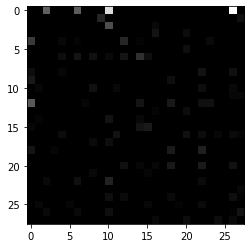

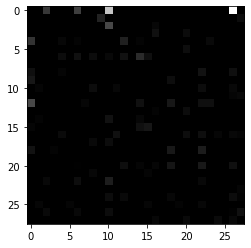

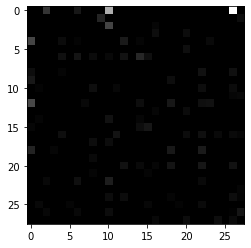

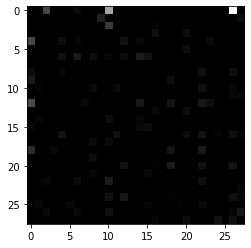

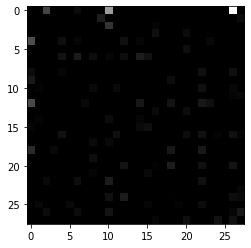

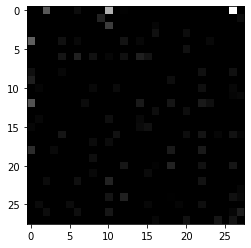

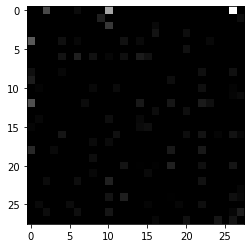

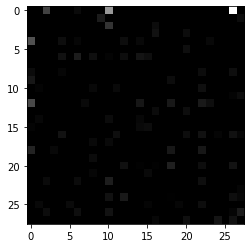

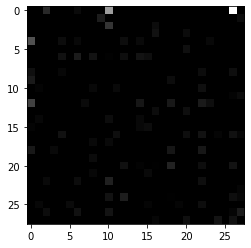

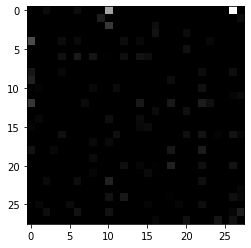

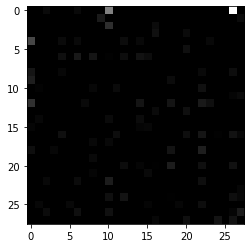

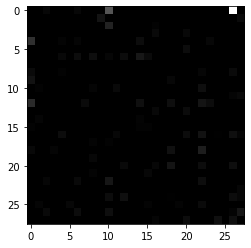

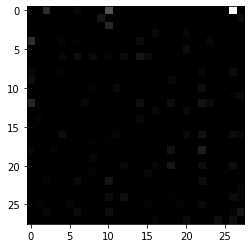

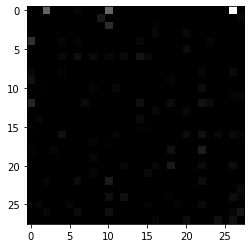

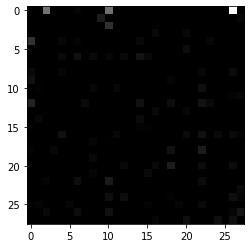

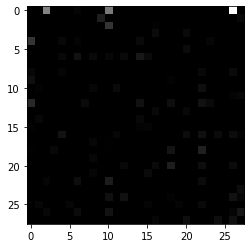

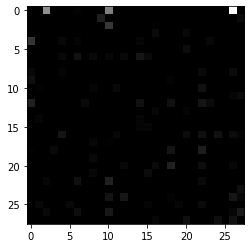

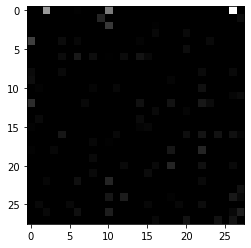

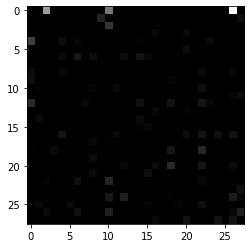

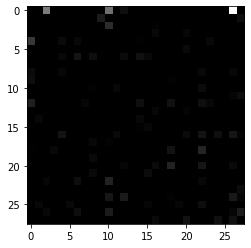

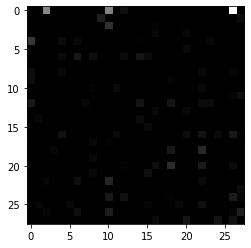

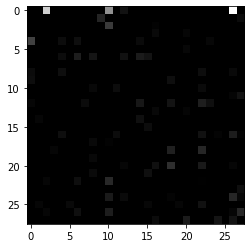

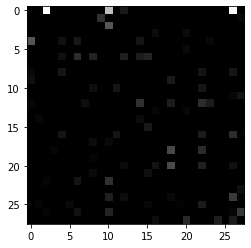

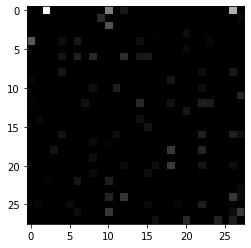

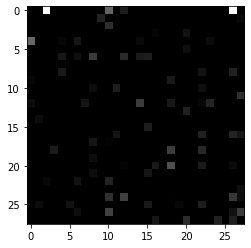

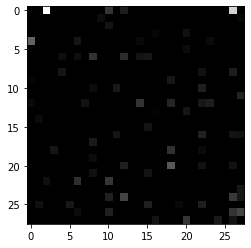

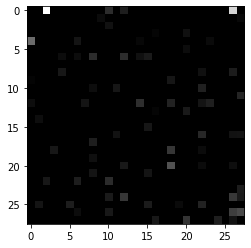

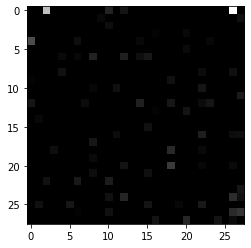

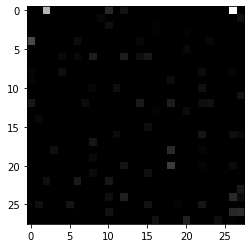

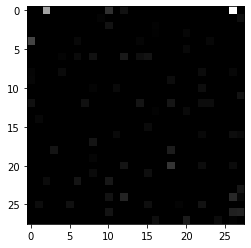

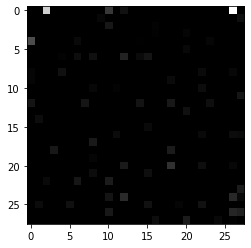

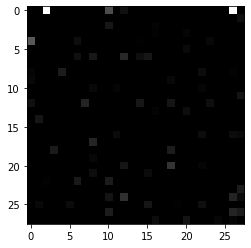

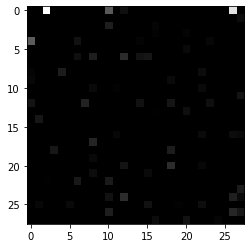

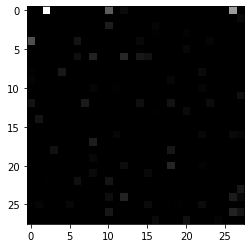

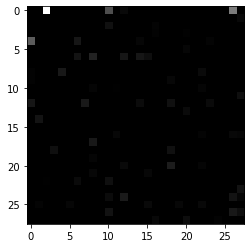

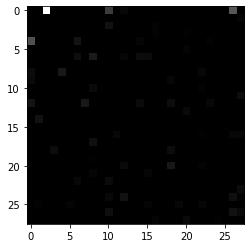

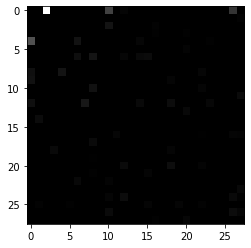

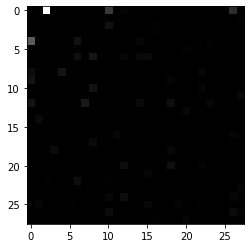

In [47]:
for j in range(50):
    plt.imshow(samples[j][73].reshape(28,28),cmap="gray")
    plt.show()

In [ ]:
with tf.Session() as sess:
    
    sess.run(init)
    
    # Recall an epoch is an entire run through the training data
    for e in range(epochs):
        # // indicates classic division
        num_batches = len(Xej) // batch_size
        
        for i in range(num_batches):
            
            # Grab batch of images
            batch = Xej[i*batch_size:(i+1)*batch_size]#mnist.train.next_batch(batch_size)
            
            # Get images, reshape and rescale to pass to D
            batch_images = batch.reshape((batch_size, 784))
            batch_images = batch_images*2 - 1
            
            # Z (random latent noise data for Generator)
            # -1 to 1 because of tanh activation
            batch_z = np.random.uniform(-1, 1, size=(batch_size, 100))
            
            # Run optimizers, no need to save outputs, we won't use them
            _ = sess.run(D_trainer, feed_dict={real_images: batch_images, z: batch_z})
            _ = sess.run(G_trainer, feed_dict={z: batch_z})
        
            
        print("Currently on Epoch {} of {} total...".format(e+1, epochs))
        
        # Sample from generator as we're training for viewing afterwards
        sample_z = np.random.uniform(-1, 1, size=(1, 100))
        gen_sample = sess.run(generator(z ,reuse=True),feed_dict={z: sample_z})
        
        samples.append(gen_sample)
        
#         saver.save(sess, './models/500_epoch_model.ckpt')

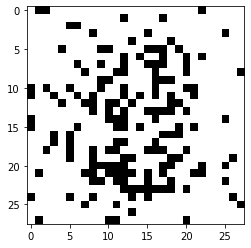

In [33]:
plt.imshow(samples[289].reshape(28,28),cmap='Greys')

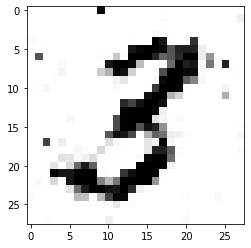

In [39]:
plt.imshow(samples[49].reshape(28,28),cmap='Greys')

In [63]:
sal[12]

<tf.Variable 'kew_3/Variable:0' shape=(5, 5, 1, 2) dtype=float32>

In [ ]:
tf.layers.batch_normalization()